# Class 25: Spectral Properties of Graphs

Goal of today's class:
1. Understand the relation between graph spectra and graph structures
2. Use spectral graph theory techniques in different applications of network science.
3. Get to know the venues SGT can open in network analysis in general.

***Acknowledgement: This chapter is adapted from the 2024 final project of Almostafa (Mostafa) Mohamed, a PhD student in Physics at Northeastern University!***
__________

1. Come in. Sit down. Open Teams.
2. Find your notebook in your /Class_25/ folder.
________

***Please note...***

1. This is a **practical** introduction to the spectral properties of networks. Proofs will be skipped, but resources for further readings will be provided.
2. Familiarity with the basics of Linear Algebra is assumed.

![](images/intro.png)

## The Unreasonable Effectiveness of Spectral Graph Theory

Spectral graph theory (SGT) is a branch of mathematics that studies the relationships between the structure of a graph and the eigenvalues and eigenvectors of matrices associated with it, such as the adjacency matrix, the Laplacian matrix, and their normalized counterparts. These matrices encode the connectivity and interactions between nodes, making spectral methods an essential tool for understanding both the local and global properties of graphs. The field provides a bridge between algebra, geometry, and graph theory, enabling the exploration of graph properties through the lens of linear algebra.


The effectiveness of spectral graph theory lies in its ability to reveal profound insights into complex systems through relatively simple computations. Spectral methods are widely used to measure graph connectivity, detect communities, and solve optimization problems such as graph partitioning. For example, the eigenvalues of the Laplacian matrix provide information about a graph's robustness, with the spectral gap quantifying its connectivity. Additionally, spectral clustering—one of the most celebrated applications—uses eigenvectors to uncover natural groupings in data, even in non-convex or irregular structures.

Beyond applications, the elegance of spectral graph theory lies in its generality, as the same mathematical principles can be applied to solve problems in network science, machine learning and physics. This versatility and predictive power underscore why spectral graph theory is considered unreasonably effective in tackling a variety of scientific questions.

*Please watch this great talk to get a feel of the powerfulness of SGT:*

[The Unreasonable Effectiveness of Spectral Graph Theory](https://www.youtube.com/watch?v=8XJes6XFjxM) - James R. Lee, University of Washington

____
In this notebook, we will walk through a hands-on introduction to the basics of SGT and some of its applications in network science. Are you ready to listen to the [music of graphs](https://www.jasondavies.com/graph-music/)?

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import itertools
from matplotlib import colormaps

## The Adjacency Matrix

### Definition

The Adjacency Matrix $A$ of a graph $G$ is defined as:

\begin{align} A_{ij} = \begin{cases}
1 & \text{if} \ (i,j) \in E, \\
0 & \text{otherwise}. \\
\end{cases}
\end{align}

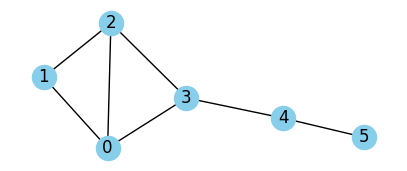

[[0 1 1 1 0 0]
 [1 0 1 0 0 0]
 [1 1 0 1 0 0]
 [1 0 1 0 1 0]
 [0 0 0 1 0 1]
 [0 0 0 0 1 0]]


In [2]:
# CREATE A SIMPLE GRAPH
G = nx.Graph()
edges_list = [(0, 1), (0, 2), (0, 3), (1, 2), (2, 3), (3, 4), (4, 5)]
G.add_edges_from(edges_list)

fig, ax = plt.subplots(1,1,figsize=(5,2),dpi=100)
nx.draw(G, with_labels=True, node_color='skyblue', ax=ax)

plt.show()

# GET THE ADJACENCY MATRIX
A = nx.adjacency_matrix(G).toarray()
print(A)

Note that $a_{ij}^n$ gives the number of paths of length $n$ between nodes $i$ and $j$.

In [3]:
path_length = 2
node1, node2 = 2, 1
print(f"Number of paths of length {path_length} between nodes ({node1}, {node2})\
 is {np.linalg.matrix_power(A, path_length)[node1, node2]}")

Number of paths of length 2 between nodes (2, 1) is 1


<b>Exercise 1:</b> How many paths of length 3 exist between nodes 4 and 5? Is the answer surprising? What are these paths?

__________

### Normalized Adjacency Matrix
Let's first define the degree matrix, which will appear in many definitions in SGT

$$ D_{ij} = \begin{cases} \text{deg}(v_i) & i =j \\
0  & i\neq j \end{cases} $$

The normalized adjacency matrix is defined as

$$A_\text{norm} = D^{-1/2} A D^{-1/2}.$$

In [4]:
def D_minus_half(X):
    ''' Generate the D^(-1/2) matrix from a diagonal matrix X '''
    D = np.zeros(X.shape)
    for i in range(len(X)):
        if X[i,i] != 0:
            D[i,i] = X[i,i]**(-0.5)
        else:
            D[i,i] = 0
    return D

def A_norm(G):
    ''' Generate the normalized adjacency matrix from the graph G '''
    deg_seq = [d for _ , d in G.degree()]
    D = np.diag(deg_seq)
    return D_minus_half(D) @ nx.adjacency_matrix(G).toarray() @ D_minus_half(D)

### Properties of $\mathbf{A}_\text{norm}$

- $\mathbf{A}_\text{norm}^{T} = \mathbf{A}_\text{norm}$ (which makes it ideal for spectral analysis.)
- All eigenvalues of $\mathbf{A}_\text{norm}$ are within $[-1,1]$.
- $G$ is bipartite if and only if $-1$ is an eigenvalue of $A_\text{norm}$. <br>

It can be shown that a graph $G$ is bipartite if and only if it contains no cycles of odd length. Therefore one eigenvalue says something about all cycles in the graph! 

In [5]:
# CREATE A CONNECTED BIPARTITE GRAPH
connected = False
while not connected:
    G_bipartite = nx.bipartite.gnmk_random_graph(30, 40, 190)
    connected = nx.is_connected(G_bipartite)

# VERIFY THE SPECTRUM HAS -1
A_normalized = A_norm(G_bipartite)
vals, vecs = np.linalg.eig(A_normalized)
round_vals = np.round(vals.real, 3)
print(f"Bipartite: Do the eigenvalues contain -1? {-1 in round_vals}")

# CREATE A RANDOM GRAPH (NOT BIPARTITE), AND VERIFY WHETHER THE SPECTRUM HAS -1
connected = False
while not connected:
    G = nx.gnm_random_graph(70, 190)
    connected = nx.is_connected(G)
A_normalized = A_norm(G)
vals, vecs = np.linalg.eig(A_normalized)
round_vals = np.round(vals.real, 3)
print(f"Erdos-Renyi: Do the eigenvalues contain -1? {-1 in round_vals}")

Bipartite: Do the eigenvalues contain -1? True
Erdos-Renyi: Do the eigenvalues contain -1? False


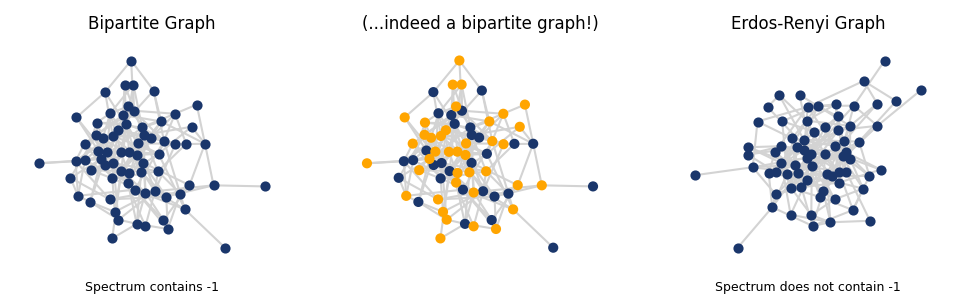

In [6]:
# PLOT THE GRAPHS
fig, ax = plt.subplots(1,3, figsize=(8,2), dpi=150)
pos = nx.spring_layout(G_bipartite, seed = 20)

colors = ['#1a366b' if G_bipartite.nodes[node]['bipartite'] == 0
          else 'orange' for node in G_bipartite.nodes()]    
nx.draw(G_bipartite, pos, with_labels=False, node_size=15,
        node_color='#1a366b', ax = ax[0], edge_color = 'lightgray')

ax[0].set_title('Bipartite Graph', fontsize=8)
ax[0].text(0.5, -0.1, f"Spectrum contains -1",
           fontsize=6, ha='center', transform=ax[0].transAxes)

nx.draw(G_bipartite, pos, with_labels=False, node_size=15,
        node_color=colors, ax = ax[1], edge_color = 'lightgray')
ax[1].set_title('(...indeed a bipartite graph!)', fontsize=8)

nx.draw(G, with_labels=False, node_size=15,
        node_color='#1a366b', ax=ax[2], edge_color='lightgray')
ax[2].set_title('Erdos-Renyi Graph', fontsize=8);
ax[2].text(0.5, -0.1, f"Spectrum does not contain -1",
           fontsize=6, ha='center', transform=ax[2].transAxes);

plt.show()

__________

### Community Structure and Fiedler Vector

Community detection is a fundamental problem in network science, aimed at identifying groups of nodes (communities) that are more densely connected internally than with the rest of the network. One popular approach to this problem is modularity maximization, a technique that seeks to optimize a quality function called modularity. Modularity measures the strength of division of a network into communities by comparing the actual density of edges within proposed groups to the expected density in a randomized network with the same degree distribution. Higher modularity values indicate more well-defined community structures. 

Modularity is defined as follows:

$$ M = \frac{1}{2m} \sum_{i,j} \left(A_{ij}-\frac{k_i k_j}{2m}\right) \delta_{g_i,g_j}, $$
where $m$ is the total number of edges, $\delta_{ij}$ is the kronecker-delta function 

It can be shown [(Newman, 2013)](https://doi.org/10.1103/PhysRevE.88.042822) that the modularity maximization problem for the simple case of two communities can be cast into solving an eigensystem of the following form

$$ (\mathbf{D}^{-1/2}\mathbf{A} \mathbf{D}^{-1/2}) \mathbf{u} = \lambda \mathbf{u},$$

$$ \mathbf{A}_\text{norm} \mathbf{u} = \lambda \mathbf{u}.$$

with the eigenvector corresponding to the second largest eigenvalue of $\mathbf{A}_\text{norm}$ carrying information about nodes assignment to partitions/communities. (The second largest eigenvalue is called [Algebraic Connectivity](https://en.wikipedia.org/wiki/Algebraic_connectivity), and the corresponding eigenvector is called the Fiedler Vector).

In [7]:
def D_minus_half(D):
    """
    Given a diagonal degree matrix D, return D^{-1/2}.

    D is assumed to be a square diagonal matrix. For zero-degree
    entries, we keep the corresponding diagonal of D^{-1/2} at 0
    to avoid division by zero.

    Parameters
    ----------
    D : np.ndarray
        Diagonal degree matrix of shape (n, n).

    Returns
    -------
    np.ndarray
        Diagonal matrix D^{-1/2} of shape (n, n).
    """
    # Extract the diagonal as a 1D array
    d = np.diag(D).astype(float)

    # Compute 1/sqrt(d_i) where d_i > 0, else 0
    inv_sqrt = np.zeros_like(d, dtype=float)
    nonzero = d > 0
    inv_sqrt[nonzero] = 1.0 / np.sqrt(d[nonzero])

    # Put back on the diagonal
    return np.diag(inv_sqrt)


def fiedler_partitioning_method(G, rank_from_top=2, precision=5):
    """
    Two-way spectral partition of G using an eigenvector of the
    normalized adjacency matrix A_norm = D^{-1/2} A D^{-1/2}.

    Parameters
    ----------
    G : networkx.Graph
        Undirected graph.
    rank_from_top : int, optional (default=2)
        Which eigenvector (by eigenvalue rank from the top) to use.
        rank_from_top = 1 -> largest eigenvalue
        rank_from_top = 2 -> second-largest eigenvalue (Fiedler direction)
    precision : int or None, optional (default=5)
        If not None, eigenvalues and the chosen eigenvector are rounded
        for display / interpretability.

    Returns
    -------
    assignment : np.ndarray
        Array of length n with entries in {-1, 0, +1} indicating the
        community assignment based on the sign of the chosen eigenvector.
    """
    n = G.number_of_nodes()

    # Degree and adjacency
    deg_seq = np.array([d for _, d in G.degree()], dtype=float)
    D = np.diag(deg_seq)
    A = nx.to_numpy_array(G, dtype=float)

    # Normalized adjacency: A_norm = D^{-1/2} A D^{-1/2}
    D_mhalf = D_minus_half(D)
    A_norm = D_mhalf @ A @ D_mhalf

    # Eigen-decomposition
    vals, vecs = np.linalg.eigh(A_norm)  # ascending order

    # Optional: inspect eigenvalues
    if precision is not None:
        print("First few eigenvalues of A_norm (ascending):",
              np.round(vals[:5], precision))
        print("Largest eigenvalues of A_norm:",
              np.round(vals[-5:], precision))

    # Choose eigenvector corresponding to the rank_from_top-th largest eigenvalue
    if rank_from_top < 1 or rank_from_top > len(vals):
        raise ValueError(f"rank_from_top must be between 1 and {len(vals)}")

    idx_sorted = np.argsort(vals)        # ascending
    idx = idx_sorted[-rank_from_top]     # index of the chosen eigenvalue
    vec = vecs[:, idx]

    if precision is not None:
        vec = np.round(vec, precision)

    assignment = np.sign(vec)

    colors = ["orange" if x > 0 else "palevioletred" for x in assignment]
    pos = nx.spring_layout(G, seed=0)

    fig, ax = plt.subplots(1,1,figsize=(5,5),dpi=100)
    nx.draw(G, pos, with_labels=False, node_color=colors, node_size=40,
            linewidths=0, edge_color="lightgray", ax=ax)
    ax.set_title(f"Spectral partitioning (rank_from_top = {rank_from_top})")
    ax.set_axis_off()
    
    plt.show()

    return assignment

First few eigenvalues of A_norm (ascending): [-0.66423 -0.60396 -0.58259 -0.56497 -0.55   ]
Largest eigenvalues of A_norm: [0.56449 0.5764  0.60334 0.87929 1.     ]


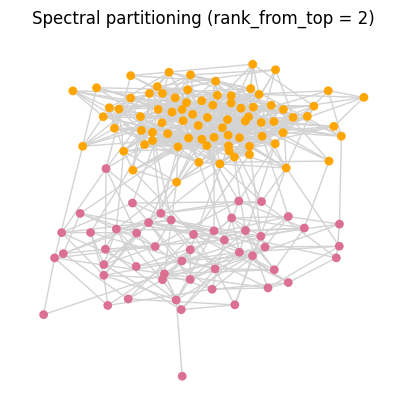

In [8]:
G = nx.stochastic_block_model([50, 80], [[0.14, 0.01], [0.01, 0.14]])
comm_assign = fiedler_partitioning_method(G)

What the Fiedler method does is essentially minimizing $\sum_{i=1}^n (x_i - x_j)^2$ subject to the constraints $\sum x_i^2 = n$ and $\sum x_i = 0$, where $x_i$ is the Fiedler value of node $i$. For a closer look at how Fiedler method works under the hood as well as some of its limitations: [(Justin Wyss-Gallifent, 2011)](https://www.math.umd.edu/~immortal/MATH401/book/ch_graph_theory.pdf)

#### Further Resources:
- The Fiedler method can be generalized to include the first k-eigenvectors which can be used to find a useful k-way partition [(James Lee, 2014)](https://arxiv.org/pdf/1111.1055).
- A paper that explores the relation between the third smallest eigenvalue and graph structure [(Pati, 2001)](https://doi.org/10.13001/1081-3810.1066).

_________

### Random Walks

![](images/random_walk.jpeg)

A simple random walk is a discrete-time stochastic process whose state space is $V$, and the transition probabilities are given by 

$$ p_{ij} = \begin{cases} 0 & i \nsim j \\ 
\frac{1}{k_\text{out}(i)} & i \sim j \end{cases}$$

where the notation $i \sim j$ means there is an edge between vertices $i$ and $j$. That is, at each step the walker jumps to a uniformly chosen neighbor of its current vertex.

The transition matrix of this Markov chain is

$$
\mathbf{P} = \mathbf{D}^{-1} \mathbf{A},
$$

and it is similar to the normalized adjacency matrix:

$$
\mathbf{P}
  = \mathbf{D}^{-1} \mathbf{A}
  = \mathbf{D}^{-1/2} \bigl( \mathbf{D}^{-1/2} \mathbf{A} \mathbf{D}^{-1/2} \bigr) \mathbf{D}^{1/2}
  = \mathbf{D}^{-1/2} \mathbf{A}_{\text{norm}} \mathbf{D}^{1/2}.
$$

Thus $\mathbf{P}$ and $\mathbf{A}_{\text{norm}}$ have the same eigenvalues. For a connected graph, the random walk has a unique stationary distribution $ \pi_j = \frac{k_j}{\sum_{v \in V} k_v} $. It can be shown that the rate of convergence of the random walk to the stationary distribution is controlled by the eigenvalues of $\mathbf{A}_{\text{norm}}$ (equivalently, by those of the normalized Laplacian).


_______
**Result.** Let $G$ be a connected, non-bipartite graph, and let $\mathbf{A}_{\text{norm}}$ have eigenvalues $ 1 = \lambda_1 \ge \lambda_2 \ge \dots \ge \lambda_n \ge -1 $. We define $ \lambda = \max\{ |\lambda_2|,\,|\lambda_n| \} < 1 $. Then for all vertices $i,j$ and all $t \ge 0$,

$$
\bigl| p_{ij}^{(t)} - \pi_j \bigr|
  \;\le\; \lambda^t \sqrt{\frac{k_j}{k_i}},
$$

where $p_{ij}^{(t)}$ is the $(i,j)$ entry of $\mathbf{P}^t$.

In other words, the distance to stationarity decays at a rate governed by $\lambda$: the smaller $\lambda$ is, the faster the convergence. Since the eigenvalues of the normalized Laplacian satisfy

$$
\mu_k = 1 - \lambda_k,
$$

this bound can also be expressed in terms of the spectrum of $\mathbf{L}_{\text{norm}}$.


In [9]:
# (from class 16!)

def random_walk_network(G, start_node, steps):
    """
    Simulates a random walk on a network, represented as a graph.

    Starting from the specified node, the walker moves to a randomly selected 
    neighboring node at each step. If the walker reaches an isolated node (one with 
    no neighbors), the walk terminates early.

    Parameters
    ----------
    G : networkx.Graph
        The graph representing the network on which the random walk is performed. 
        Nodes should be connected by edges, as each edge represents a possible transition.
    start_node : node
        The node in G where the random walk starts. Must be a valid node in the graph.
    steps : int
        The number of steps the random walker will attempt to take. Note that the walk 
        may terminate early if an isolated node is reached.

    Returns
    -------
    path : list
        A list of nodes representing the path taken by the walker, starting from 
        `start_node`. The list length will be `steps + 1` unless the walk terminates early 
        at an isolated node.

    Notes
    -----
    - At each step, the walker chooses a neighboring node uniformly at random.
    - If the walker reaches an isolated node (one with no neighbors), the walk stops early.
    - This function assumes the graph `G` is undirected, but it can be adapted for 
      directed networks by modifying the neighbor selection.

    Examples
    --------
    >>> G = nx.path_graph(5)  # Simple path graph with 5 nodes
    >>> random_walk_network(G, start_node=0, steps=10)
    [0, 1, 2, 1, 2, 3, 2, 1, 0, 1, 2]
    """
    # Initialize the path list with the starting node
    path = [start_node]
    
    # Set the current node to the starting node
    current_node = start_node
    
    # Iterate for the specified number of steps
    for _ in range(steps):
        # Get the list of neighbors of the current node
        neighbors = list(G.neighbors(current_node))
        
        # If the current node has neighbors, move to a randomly chosen neighbor
        if neighbors:
            next_node = np.random.choice(neighbors)  # Select a random neighbor
            path.append(next_node)  # Append the selected neighbor to the path
            current_node = next_node  # Update the current node
        else:
            # If no neighbors (isolated node), terminate the walk early
            break

    return path  # Return the full path taken by the walker

In [10]:
# GENERATE A CONNECTED ERDOS-RENYI GRAPH
n = 200
p = 0.2
connected = False
while not connected:
    G = nx.erdos_renyi_graph(n, p)
    connected = nx.is_connected(G)

# GET THE MATRICES ASSOCIATED WITH THE GRAPH
A = nx.adjacency_matrix(G).toarray() # adjacency matrix
A_normalized = A_norm(G) # normalized adjacency matrix
d = np.sum(A, axis=1) # degree of each node
pi = d / np.sum(d) # stationary distribution of the random walk
D = np.diag(d) # degree matrix
P = np.linalg.inv(D) @ A # transition matrix of the random walk

# GET THE SECOND HIGHEST EIGENVALUE 
vals, vecs = np.linalg.eigh(A_normalized)
round_vals = np.round(vals.real, 3)
round_vals = sorted(round_vals)
lam = max([np.abs(round_vals[-2]), np.abs(round_vals[0])])

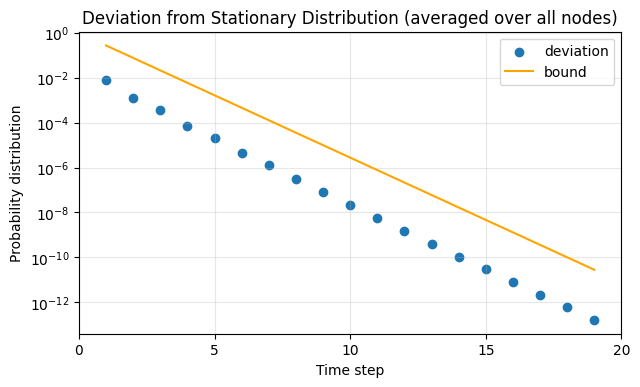

In [11]:
# nx.draw(G, with_labels=True)

# CALCULATING BOTH SIDES OF THE INEQUALITY
time_steps = 20
i, j = 10, 3
time_axis = list(range(1, time_steps))
lhs, rhs = [], []
for t in time_axis:
    yl = 0
    yr = 0
    for node in list(G.nodes()):
        yl += np.abs(np.linalg.matrix_power(P, t)[i, node] - pi[node])
        yr += np.abs(lam)**t * np.sqrt(d[i]/d[node])
    lhs.append(yl/n)
    rhs.append(yr/n)


fig, ax = plt.subplots(1,1,figsize=(7,4),dpi=100)    

ax.scatter(time_axis, lhs, label = "deviation")
ax.plot(time_axis, rhs, label = "bound", color='orange')

ax.set_yscale('log')
ax.set_xlabel('Time step')
ax.set_xlim(0, 20)
ax.set_xticks([0,5,10,15,20])
ax.set_ylabel('Probability distribution')
ax.set_title('Deviation from Stationary Distribution (averaged over all nodes)')
ax.legend()
ax.grid(alpha = 0.3)


plt.show()

<b>Exercise 2:</b> What are some examples of graphs that have low convergence rate (slow mixing)?

#### References:
[1] Sawyer Jack Robertson (2020): A Survey of Random Walks on Networks https://mathweb.ucsd.edu/~s5robert/documents/random_walks.pdf
_____________



## The Laplacian Matrix

### Definition

The Laplacian matrix of a graph is a key mathematical object in spectral graph theory. It encodes how each node is connected to its neighbors and plays a central role in diffusion processes, random walks, and community detection.

For an undirected, unweighted graph with adjacency matrix $\mathbf{A}$ and degree matrix $\mathbf{D} = \mathrm{diag}(k_1,\dots,k_n)$, the (combinatorial) Laplacian is defined entrywise as

$$
L_{ij} = 
\begin{cases}
-1 & \text{if } (i,j) \in E, \\
k_i & \text{if } i = j, \\
0 & \text{otherwise},
\end{cases}
$$

or more succinctly as

$$
\mathbf{L} = \mathbf{D} - \mathbf{A}.
$$


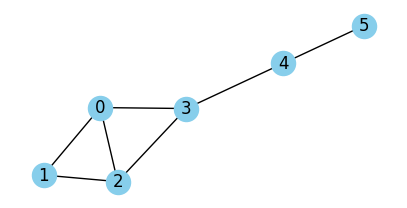

[[ 3 -1 -1 -1  0  0]
 [-1  2 -1  0  0  0]
 [-1 -1  3 -1  0  0]
 [-1  0 -1  3 -1  0]
 [ 0  0  0 -1  2 -1]
 [ 0  0  0  0 -1  1]]


In [12]:
G = nx.Graph()
edges_list = [(0, 1), (0, 2), (0, 3), (1, 2), (2, 3), (3, 4), (4, 5)]
G.add_edges_from(edges_list)

fig, ax = plt.subplots(1,1,figsize=(5,2.5),dpi=100)
nx.draw(G, with_labels=True, ax=ax, node_color='skyblue')
plt.show()

L = nx.laplacian_matrix(G).toarray()
print(L)

### Properties of $\mathbf{L}_\text{norm}$

A closely related object is the **symmetric normalized Laplacian**, defined by

$$
\mathbf{L}_{\text{norm}} 
  = \mathbf{I} - \mathbf{D}^{-1/2} \mathbf{A} \mathbf{D}^{-1/2}
  = \mathbf{I} - \mathbf{A}_{\text{norm}}.
$$

This is exactly the matrix associated with the normalized adjacency $\mathbf{A}_{\text{norm}} = \mathbf{D}^{-1/2} \mathbf{A} \mathbf{D}^{-1/2}$ we used earlier for spectral partitioning. The two matrices share the same eigenvectors, and their eigenvalues are related by a simple shift: if
$\mathbf{A}_{\text{norm}} \mathbf{u} = \lambda \mathbf{u}$, then
$\mathbf{L}_{\text{norm}} \mathbf{u} = (1 - \lambda)\mathbf{u}$.


### Spectral properties of Laplacians

Let $\lambda_1 \leq \lambda_2 \leq \dots \leq \lambda_n$ be the eigenvalues of a Laplacian matrix ($\mathbf{L}$ or $\mathbf{L}_{\text{norm}}$) of size $n \times n$. Then:

1. The Laplacian is symmetric, so all eigenvalues $\lambda_i$ are real.
2. The Laplacian is positive semi-definite, so $\lambda_i \ge 0$ for all $i$.
3. $\lambda_1 = 0$, Multiplicity of $\lambda_1$ = number of connected components of the graph.
4. A graph $G$ is connected if and only if $\lambda_2 > 0$.

For the normalized Laplacian $\mathbf{L}_{\text{norm}}$, there is an additional useful bound:

$$
0 = \lambda_1 \le \lambda_2 \le \dots \le \lambda_n \le 2.
$$

The eigenvalue $\lambda_2$ is often called the *algebraic connectivity* of the graph, and the corresponding eigenvector is the Fiedler vector. In the previous section, we effectively used this vector (through $\mathbf{A}_{\text{norm}}$) to define a two-way spectral partition of the network.
________


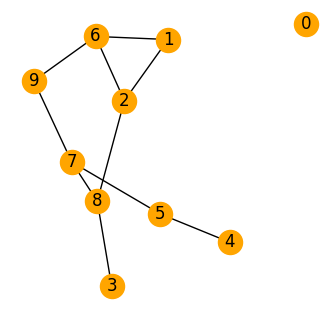

Eigenvalues are: [ 4.847  4.44  -0.     0.328  0.651  1.315  2.166  3.505  2.747  0.   ]

The multiplicity of zero = 2
The number of connected components = 2


In [13]:
# CREATE A RANDOM GRAPH
G = nx.erdos_renyi_graph(10, 0.2)
pos = nx.spring_layout(G, k = 0.7)

fig, ax = plt.subplots(1,1,figsize=(4,4),dpi=100)
nx.draw(G, pos, with_labels=True, node_color='orange', ax=ax)

plt.show()


# GET THE LAPLACIAN MATRIX
L = nx.laplacian_matrix(G).toarray()
eigenvalues = np.linalg.eigvals(L)
round_vals = np.round(eigenvalues.real, 3)
print(f"Eigenvalues are: {round_vals}\n")

# COUNT THE NUMBER OF ZERO EIGENVALUES AND COMPARE WITH NUMBER OF CONNECTED COMPONENTS
zero_count = np.count_nonzero(round_vals == 0)
print(f"The multiplicity of zero = {zero_count}")
print(f"The number of connected components = {len(list(nx.connected_components(G)))}")

### Laplacian spectra of some famous graphs

For a few classical families of graphs, the eigenvalues of the combinatorial Laplacian
$\mathbf{L} = \mathbf{D} - \mathbf{A}$ can be written in closed form.

- The Laplacian of the complete graph, $K_n$, has eigenvalue 0 with multiplicity 1 and eigenvalue $n$ with multiplicity $n-1$.
- The Laplacian of the cycle graph, $C_n$, has eigenvalues $2-2 \cos{(\frac{2\pi k}{n})} $.
- The Laplacian of the path graph, $P_n$, has the same eigenvalues as $C_{2n} = 2-2 \cos{(\frac{\pi k}{n})}$.


<!-- 
- **Complete graph $K_n$.**  
  The Laplacian of the complete graph can be written as
  
  $$
  \mathbf{L}(K_n) = n \mathbf{I} - \mathbf{J},
  $$

  where $\mathbf{J}$ is the all-ones matrix. Since $\mathbf{J}$ has one
  eigenvalue $n$ (with eigenvector $\mathbf{1}$) and $0$ with multiplicity $n-1$,
  it follows that
  
  $$
  \text{spec}(\mathbf{L}(K_n)) = \{\,0, \underbrace{n,\dots,n}_{n-1 \text{ times}}\,\}.
  $$
  
  In particular, the zero eigenvalue has multiplicity one, reflecting that $K_n$ is connected.

- **Cycle graph $C_n$.**  
  The cycle $C_n$ is 2-regular, so $\mathbf{L}(C_n) = 2\mathbf{I} - \mathbf{A}(C_n)$.
  The adjacency spectrum of $C_n$ is given by
  
  $$
  \lambda_k(\mathbf{A}(C_n)) = 2 \cos\!\left(\frac{2\pi k}{n}\right),
  \qquad k = 0,1,\dots,n-1.
  $$
  
  Therefore the Laplacian eigenvalues are
  
  $$
  \lambda_k(\mathbf{L}(C_n)) = 2 - 2 \cos\!\left(\frac{2\pi k}{n}\right),
  \qquad k = 0,1,\dots,n-1.
  $$

- **Path graph $P_n$.**  
  The path $P_n$ can be thought of as a "cycle with two broken edges," and its Laplacian
  acts like a discrete second derivative with boundary conditions at the ends.
  Its eigenvalues are
  
  $$
  \lambda_k(\mathbf{L}(P_n))
    = 2 - 2 \cos\!\left(\frac{\pi k}{n+1}\right),
    \qquad k = 1,2,\dots,n.
  $$
  
  These values form a subset of the eigenvalues of a larger cycle graph and
  approach a continuous spectrum as $n$ grows.
 -->

In [14]:
n = 10

# COMPLETE GRAPH
G_complete = nx.complete_graph(n)
L_complete = nx.laplacian_matrix(G_complete).toarray()
print(f"Eigenvalues of the complete graph: \
{np.round(np.linalg.eigvals(L_complete).real, 3)}")

Eigenvalues of the complete graph: [10. -0. 10. 10. 10. 10. 10. 10. 10. 10.]


In [15]:
n = 20
# CYCLE AND PATH GRAPHS
G_cycle = nx.cycle_graph(n)
L_cycle = nx.laplacian_matrix(G_cycle).toarray()

G_path = nx.path_graph(n)
L_path = nx.laplacian_matrix(G_path).toarray()

G_er = nx.erdos_renyi_graph(n, 0.2)
L_er = nx.laplacian_matrix(G_er).toarray()

eigvals_cycle, eigvec_cycle = np.linalg.eig(L_cycle)
eigvals_cycle = eigvals_cycle.real

eigvals_path, eigvec_path = np.linalg.eig(L_path)
eigvals_path = eigvals_path.real

eigvals_er, eigvec_er = np.linalg.eig(L_er)
eigvals_er = eigvals_er.real


# THEORETICAL EIGENVALUES
theoretical_eigvals_cycle = [2 * (1 - np.cos(2 * np.pi * k / n)) for k in range(n)]
theoretical_eigvals_path = [2 * (1 - np.cos(np.pi * k / n)) for k in range(n)]

# The order of computed eigenvalues might not match the theoretical values,
# so we rearrange them based on their proximity to the theoretical values.
matched_indices_cycle = [np.argmin(np.abs(eigvals_cycle - theo_val))
                         for theo_val in theoretical_eigvals_cycle]
matched_eigvals_cycle = eigvals_cycle[matched_indices_cycle]

matched_indices_path = [np.argmin(np.abs(eigvals_path - theo_val))
                        for theo_val in theoretical_eigvals_path]
matched_eigvals_path = eigvals_path[matched_indices_path]

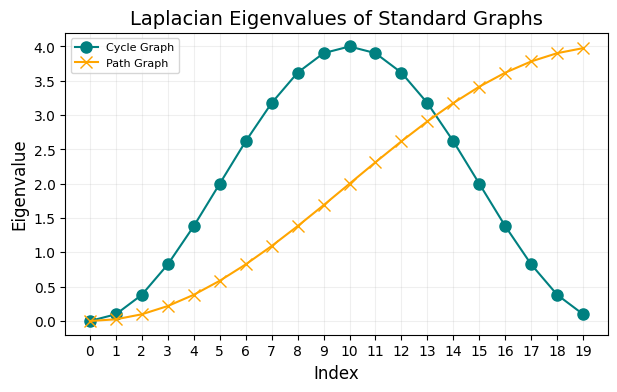

In [16]:
# PLOT THE EIGENVALUES
fig, ax = plt.subplots(1,1,figsize=(7,4),dpi=100)

ax.plot(range(n), matched_eigvals_cycle, 'o-', label='Cycle Graph', markersize=8, color = 'teal')
ax.plot(range(n), matched_eigvals_path, 'x-', label='Path Graph', markersize=8, color = 'orange')

ax.set_title('Laplacian Eigenvalues of Standard Graphs', fontsize=14)
ax.set_xlabel('Index', fontsize=12)
ax.set_ylabel('Eigenvalue', fontsize=12)
ax.set_xticks(ticks=np.arange(0, len(range(n)), step=1))
ax.set_xticklabels(np.arange(0, len(range(n)), step=1))
ax.legend(fontsize=8)
ax.grid(alpha=0.2)


plt.show()

#### Laplacian Spectra of ER and BA graphs

Notice the BA eigenvalues are much smaller than ER graphs, with the latter centering around $\lambda=np$.

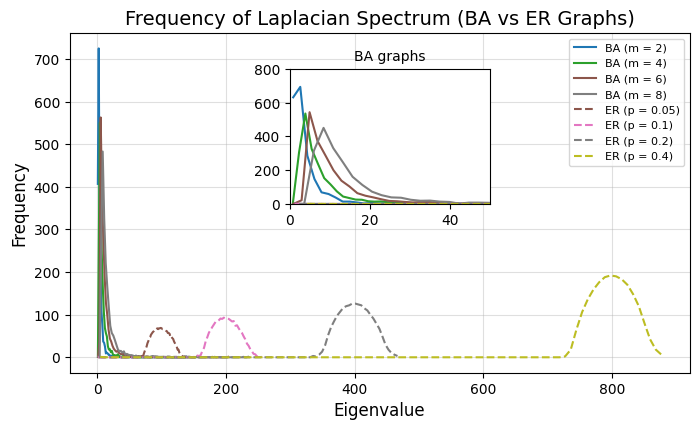

In [17]:
from matplotlib import colormaps

# Parameters for ER and BA graphs
n = 2000 
p_values = [0.05, 0.1, 0.2, 0.4]  # Different probabilities for ER graphs
m_values = [2, 4, 6, 8]  # Different values of m for BA graphs
bins = 100 


fig, ax = plt.subplots(1,1,figsize=(8, 4.5),dpi=100)

# Plot Laplacian spectrum for BA graphs
palette = colormaps["tab10"]
for idx, m in enumerate(m_values):
    G = nx.barabasi_albert_graph(n, m)
    L = nx.laplacian_matrix(G).toarray()
    eigenvalues = np.linalg.eigvalsh(L)

    # Plot the binned frequency
    counts, bin_edges = np.histogram(eigenvalues, bins=bins, density=False)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    ax.plot(bin_centers, counts, label=f"BA (m = {m})", color=palette(idx / len(m_values)))

# Plot Laplacian spectrum for ER graphs
for idx, p in enumerate(p_values):
    G = nx.erdos_renyi_graph(n, p)
    L = nx.laplacian_matrix(G).toarray()
    eigenvalues = np.linalg.eigvalsh(L)

    # Plot the binned frequency
    counts, bin_edges = np.histogram(eigenvalues, bins=bins, density=False)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    ax.plot(bin_centers, counts, label=f"ER (p = {p})",
            linestyle="--", color=palette((idx + len(m_values)) / (len(m_values) + len(p_values))))

# Create an inset to zoom in on the BA part of the x-axis
inset_ax = fig.add_axes([0.4, 0.5, 0.25, 0.3])
for idx, m in enumerate(m_values):
    G = nx.barabasi_albert_graph(n, m)
    L = nx.laplacian_matrix(G).toarray()
    eigenvalues = np.linalg.eigvalsh(L)

    # Plot the binned frequency
    counts, bin_edges = np.histogram(eigenvalues, bins=bins, density=False)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    inset_ax.plot(bin_centers, counts, label=f"BA (m = {m})", color=palette(idx / len(m_values)))

for idx, p in enumerate(p_values):
    G = nx.erdos_renyi_graph(n, p)
    L = nx.laplacian_matrix(G).toarray()
    eigenvalues = np.linalg.eigvalsh(L)

    # Plot the binned frequency
    counts, bin_edges = np.histogram(eigenvalues, bins=bins, density=False)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    inset_ax.plot(bin_centers, counts, linestyle="--",
                  color=palette((idx + len(m_values)) / (len(m_values) + len(p_values))))

# Inset plot settings
inset_ax.set_xlim(0, 50)
inset_ax.set_ylim(0, 800)
inset_ax.set_title("BA graphs", fontsize=10)

# Main plot settings
ax.set_title("Frequency of Laplacian Spectrum (BA vs ER Graphs)", fontsize=14)
ax.set_xlabel("Eigenvalue", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
ax.legend(fontsize=8, loc="upper right")
ax.grid(alpha=0.4)

plt.show()

### Relation between normalized Laplacian and normalized adjacency matrix

(Assume there are no isolated nodes) recall the combinatorial Laplacian $ \mathbf{L} = \mathbf{D} - \mathbf{A}$ , and the normalized adjacency $ \mathbf{A}_{\text{norm}} = \mathbf{D}^{-1/2} \mathbf{A} \mathbf{D}^{-1/2}$.

The *symmetric normalized Laplacian* is defined by

$$
\mathbf{L}_{\text{norm}}
  = \mathbf{D}^{-1/2} \mathbf{L} \mathbf{D}^{-1/2}
  = \mathbf{D}^{-1/2}(\mathbf{D} - \mathbf{A})\mathbf{D}^{-1/2}
  = \mathbf{I} - \mathbf{D}^{-1/2}\mathbf{A}\mathbf{D}^{-1/2}
  = \mathbf{I} - \mathbf{A}_{\text{norm}}.
$$

Thus $\mathbf{L}_{\text{norm}}$ and $\mathbf{A}_{\text{norm}}$ share the same eigenvectors, and their eigenvalues are related by a simple shift. If $ \mathbf{A}_{\text{norm}} \mathbf{u} = \lambda \mathbf{u} $, then

$$
\mathbf{L}_{\text{norm}} \mathbf{u}
  = (\mathbf{I} - \mathbf{A}_{\text{norm}})\mathbf{u}
  = (1 - \lambda)\mathbf{u}
$$

...so $1 - \lambda$ is an eigenvalue of $\mathbf{L}_{\text{norm}}$ with the same eigenvector $\mathbf{u}$.


In the literature, the phrase "normalized Laplacian" is used in (at least) two common ways:

- the symmetric normalized Laplacian $ \mathbf{L}_{\text{norm}} = \mathbf{I} - \mathbf{D}^{-1/2}\mathbf{A}\mathbf{D}^{-1/2} $

- the random-walk normalized Laplacian $ \mathbf{L}_{\text{rw}} = \mathbf{I} - \mathbf{D}^{-1}\mathbf{A} $

These two matrices are similar (they have the same eigenvalues, with eigenvectors related by a degree rescaling). In this chapter we use the notation $\mathbf{A}_{\text{norm}}$ for the normalized adjacency, $\mathbf{L}_{\text{norm}}$ for the symmetric normalized Laplacian, and $\mathbf{L}_{\text{rw}}$ for the random-walk Laplacian to keep these relationships clear.

### Bottlenecks, Sparse Cuts and Cheeger's Inequality

Recall from above that a graph $G$ is connected if and only if $\lambda_2 > 0$, where $\lambda_2$ is the second-smallest eigenvalue of the normalized Laplacian matrix. In this section, we will see how $\lambda_2$ provides a quantitative measure of how well-connected the graph is. Intuitively, if $\lambda_2$ is very small, there is a "bottleneck" set of nodes that is only weakly connected to the rest of the graph. To make this precise, we introduce the notion of conductance.

![](images/sparse-cut.png)



#### Conductance
Let $G = (V, E)$ be an undirected graph, and let $S \subseteq V$ be a nonempty subset of vertices. The conductance of the subset $S$ is defined as

$$
\phi(S) = \frac{|\partial S|}{\mathrm{vol}(S)},
$$

where $\partial S$ denotes the set of edges with one endpoint in $S$ and one endpoint in $V \setminus S$, and $\mathrm{vol}(S) = \sum_{v \in S} k_v$ is the *volume* of $S$, i.e., the total degree of all vertices in $S$. In words, the conductance measures the fraction of "edge mass" in $S$ that actually leaves $S$.

The conductance of the whole graph $G$ is then defined as

$$
\phi(G) = \min_{\emptyset \neq S \subset V,\ \mathrm{vol}(S) \le \tfrac{1}{2}\mathrm{vol}(V)} \phi(S).
$$

(For an unweighted undirected graph, $\mathrm{vol}(V) = 2|E|$, so the condition $\mathrm{vol}(S) \le \tfrac{1}{2}\mathrm{vol}(V)$ is equivalent to $\mathrm{vol}(S) \le |E|$.) This condition simply says that we always look at the "smaller side" of a cut.

A small value of $\phi(S)$ corresponds to a collection of vertices that has very few edges leaving it, relative to its total degree, and thus represents a **sparse cut** or bottleneck in the graph. The quantity $\phi(G)$ captures the sparsest such cut. Cheeger’s inequality will relate this bottleneck quantity $\phi(G)$ to the spectral quantity $\lambda_2$ of the normalized Laplacian.



**Exercises:**

1. It's true that $ 0 < \phi(S) < 1$, can you see why?

2. Why do you think the definition has the condition $\text{vol}(S) \leq |E|$? (Hint: If the subset $S$ is a sparse cut of the graph, what can we say about the complement subset $V-S$?)

3. What's the conductance of a complete graph?

In [18]:
import itertools

def compute_conductance(G, subset):
    ''' A function to compute the conductance of a subset of nodes in a graph G
     
    Parameters:
    ----------
    G: networkx.Graph
    subset: set of nodes in the graph G
      
    Returns:
    ----------
    conductance: float
    '''

    S = set(subset)
    S_bar = set(G.nodes) - S
    cut = sum(1 for (u, v) in G.edges if (u in S and v in S_bar) or (u in S_bar and v in S))
    vol_S = sum(G.degree[node] for node in S)
    vol_S_bar = sum(G.degree[node] for node in S_bar)
    return cut / min(vol_S, vol_S_bar)


# BRUTE FORCE: SEARCH OVER SUBSETS
def brute_force_conductance(G):
    ''' A function to compute the conductance of the best partition of a graph G using brute force search
    
    Parameters:
    ----------
    G: networkx.Graph
    
    Returns:
    ----------
    min_conductance: float
    '''

    nodes = list(G.nodes)
    min_conductance = float('inf')
    for i in range(1, len(nodes) // 2 + 1):
        subsets = [set(subset) for subset in itertools.combinations(nodes, i)]
        for subset in subsets:
            phi = compute_conductance(G, subset)
            min_conductance = min(min_conductance, phi)
    return min_conductance


# FOR LARGE GRAPHS, USE HEURISTICS (e.g., Fiedler vector)
def fiedler_partition_conductance(G):
    '''
    A function to compute the conductance of the best partition
    of a graph G using the Fiedler vector

    Parameters:
    ----------
    G: networkx.Graph

    Returns:
    ----------
    conductance: float
    '''
    
    L = nx.normalized_laplacian_matrix(G).toarray()
    eigvals, eigvecs = np.linalg.eigh(L)
    fiedler_vector = eigvecs[:, 1]  # Fiedler vector
    median = np.median(fiedler_vector)
    S = {node for node, value in zip(G.nodes, fiedler_vector) if value <= median}
    return compute_conductance(G, S)

In [19]:
connected = False
while not connected:
    G1 = nx.barabasi_albert_graph(100, 2)
    G2 = nx.erdos_renyi_graph(100, 0.05)
    G3 = nx.stochastic_block_model([20, 20], [[0.9, 0.1], [0.1, 0.9]], seed=0)
    connected = nx.is_connected(G1) and nx.is_connected(G2) and nx.is_connected(G3)

conductance1 = fiedler_partition_conductance(G1)
conductance2 = fiedler_partition_conductance(G2)
conductance3 = fiedler_partition_conductance(G3)

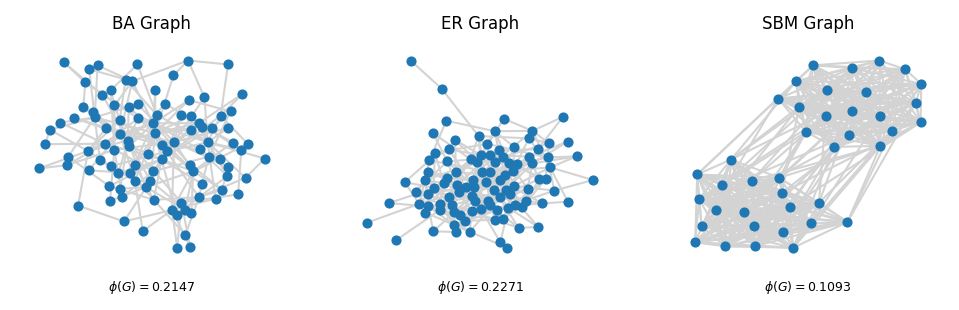

In [20]:
# PLOT THE GRAPHS
fig, ax = plt.subplots(1,3, figsize=(8,2), dpi=150)

nx.draw(G1, with_labels=False, node_size=15, ax=ax[0], edge_color = 'lightgray')
ax[0].set_title('BA Graph', fontsize=8)
ax[0].text(0.5, -0.1, f"$\phi(G)= ${np.round(conductance1, 4)}", fontsize=6,
           ha='center', transform=ax[0].transAxes)

nx.draw(G2, with_labels=False, node_size=15, ax=ax[1], edge_color = 'lightgray')
ax[1].set_title('ER Graph', fontsize=8)
ax[1].text(0.5, -0.1, f"$\phi(G)= ${np.round(conductance2, 4)}", fontsize=6,
           ha='center', transform=ax[1].transAxes)

nx.draw(G3, with_labels=False, node_size=15, ax=ax[2], edge_color = 'lightgray')
ax[2].set_title('SBM Graph', fontsize=8)
ax[2].text(0.5, -0.1, f"$\phi(G)= ${np.round(conductance3, 4)}", fontsize=6,
           ha='center', transform=ax[2].transAxes)

plt.show()

### Cheeger's Inequality

Cheeger's inequality gives a precise connection between the spectral gap of the normalized Laplacian and the conductance of the graph.

Let $\lambda_2$ be the second-smallest eigenvalue of the normalized Laplacian $\mathbf{L}_{\text{norm}}$, and let $\phi(G)$ be the conductance of $G$ as defined above. Then

$$
\frac{1}{2}\,\lambda_2 \;\le\; \phi(G) \;\le\; \sqrt{2\,\lambda_2}.
$$

Equivalently, we can rewrite this as

$$
\frac{\phi(G)^2}{2} \;\le\; \lambda_2 \;\le\; 2\,\phi(G).
$$

Thus, a small value of $\lambda_2$ guarantees the existence of a very sparse cut (low conductance), while a large value of $\lambda_2$ implies that every cut has relatively high conductance—that is, the graph is a good *expander*.

The second eigenvalue bounds the graph conductance!!

In [21]:
import itertools

G = nx.stochastic_block_model([10, 10], [[0.9, 0.1], [0.1, 0.9]])
L = nx.normalized_laplacian_matrix(G).toarray()
eigvals, eigvecs = np.linalg.eigh(L)
lambda_2 = eigvals[1]  # Second smallest eigenvalue

print(f"Second smallest eigenvalue (λ2): {lambda_2}\n")

# NOW WE COMPARE SPECTRAL GAP AND CONDUCTANCE
phi_G = fiedler_partition_conductance(G)
print(f"Estimated conductance (φ): {phi_G}\n")
print(f"Cheeger's bounds:")
print(f"{lambda_2 / 2} ≤ {phi_G} ≤ {np.sqrt(2 * lambda_2)}")

Second smallest eigenvalue (λ2): 0.25129881538571913

Estimated conductance (φ): 0.16129032258064516

Cheeger's bounds:
0.12564940769285957 ≤ 0.16129032258064516 ≤ 0.7089412040299522


### Optimization formulation for $\lambda_2$

But what if we have a very large network? Do we have to find the whole spectrum of $\mathbf{L}_\text{norm}$ to know $\lambda_2$? Fortunately, the answer is no! The problem of finding $\lambda_2$ can be written as an optimization problem for a quadratic form (the *Rayleigh quotient*).

For a symmetric matrix, the Rayleigh quotient is

$$
R(x) = \frac{x^\top \mathbf{L}_\text{norm} x}{x^\top x}.
$$

The second-smallest eigenvalue of the normalized Laplacian can be obtained as

$$
\lambda_2
  = \min_{x \in \mathbb{R}^n,\ x \neq 0,\ x \perp \mathbf{D}^{1/2}\mathbf{1}}
     \frac{x^\top \mathbf{L}_\text{norm} x}{x^\top x}.
$$

<!-- $$ \lambda_2 = \min_{x\in \mathbb{R}^{n}:x \perp \mathbf{1}}{\frac{x^T \mathbf{L}_\text{norm} x}{x^T x}} $$ -->

Here $\mathbf{D}^{1/2}\mathbf{1}$ is the eigenvector corresponding to the eigenvalue $0$ of $\mathbf{L}_\text{norm}$, and the constraint $x \perp \mathbf{D}^{1/2}\mathbf{1}$ simply means we are minimizing over vectors orthogonal to that trivial eigenvector.

**Advantages:**

- Scalability: iterative algorithms can approximate $\lambda_2$ and its eigenvector without computing the full spectrum.
- Customizability: by modifying $\mathbf{L}_\text{norm}$ or the constraints, we can adapt the method to weighted graphs or different notions of connectivity.
- No full spectrum needed: we focus directly on the extremal eigenvalue of interest, which is crucial for very large graphs.


#### References:
1. Cheeger's Inequality - Lap Chi Lau https://cs.uwaterloo.ca/~lapchi/cs860/notes/04-Cheeger.pdf

____________

## The Non-Backtracking Matrix

![](images/nonbacktracking.png)

**Image Source:** [Left] Saade, A., Krzakala, F., & Zdeborová, L. (2014). Spectral density of the non-backtracking operator on random graphs. *Europhysics Letters*, 107(5), 50005. [Right] Torres, L., Suárez-Serrato, P., & Eliassi-Rad, T. (2019). Non-backtracking cycles: length spectrum theory and graph mining applications. *Applied Network Science*, 4(1), 1-35.


### Definition

- **For a directed graph:** of size $n$ and number of edges $m$, Non-backtracking matrix is an $m \times m$ matrix (note it's indexed by edges, not nodes), defined as follows:
    
    $$ B_{ij} = \begin{cases}
            1 & \text{if edge $i$ ends where edge $j$ starts} \\
            0 & \text{otherwise} \\
        \end{cases} $$
    
    or
    
    $$B_{(j \to i), (l \to k)}=\delta_{jk}(1-\delta_{il}).$$
    
- **For undirected graphs:** we treat each edge between two vertices $(i,j)$ as two directed edges $(i\to j), (j \to i)$, and apply the same definition above (therefore for an undirected graph with number of edges $m$, $\mathbf{B}$ matrix will be of size $2m \times 2m$).

Non-backtracking walk: is a walk on a graph where $v_i$ can be chosen uniformly from the set of neighbours of $v_{i-1}$, excluding $v_{i-2}$ (no edge is traversed twice in succession). $B^k_{ij}$ gives the number of walks of length $k+1$ that start from edge $i$ and end on edge $j$ that satisfy the non-backtracking condition.

#### Your Turn!

Implement the definition of non-backtracking matrix above for directed graphs.

In [35]:
# Your turn!

def nonbacktracking_matrix(G):
    """ calculates the non-backtracking matrix of a graph G (notice the order of the edges is important)
    defined only for directed graphs.

    NOTE: list(G.edges()) changes the order of the edges_list used to construct the graph
    (orders ascendingly according to the first coordinate of the edge tuples).
    So we return it to keep track of the indices of the edges! 
    (or alternatively we can sort the edges_list before feeding it into nx.Graph)

    Input 
    G (nx.Graph): a Networkx graph

    Output
    B: numpy array of size m x m, non-backtracking matrix of the graph
    edge_list: list of edges of the graph
    """

    # Step 1: get the edges list of the graph


    # Step 2: initialize the non-backtracking matrix B (what's the size of B again?)


    # Step 3: fill in the non-backtracking matrix B by looping over the edges twice!
    # (Hint: you might find 'enumerate' useful)


    return B, edge_list


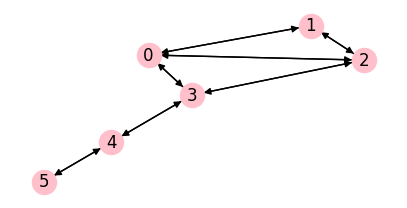

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [23]:
G = nx.DiGraph()
edges_list = [(0, 1), (0, 2), (0, 3), (1, 2), (2, 3), (3, 4), (4, 5),
              (1, 0), (2, 0), (3, 0), (2, 1), (3, 2), (4, 3), (5, 4)]
G.add_edges_from(edges_list)


fig, ax = plt.subplots(1,1,figsize=(5,2.5),dpi=100)
nx.draw(G, with_labels=True, ax=ax, node_color='pink')

plt.show()

# B, edges_list = nonbacktracking_matrix(G)
# print(B)

In [24]:
path_length = 5
edge1 = (5, 4)
edge2 = (0, 1)
edge1_idx, edge2_idx = edges_list.index(edge1), edges_list.index(edge2)
print(f"Number of paths of length {path_length} between edges {edge1} \
and {edge2} is {round(np.linalg.matrix_power(B, path_length-1)[edge1_idx, edge2_idx])}")

Number of paths of length 5 between edges (5, 4) and (0, 1) is 1


### Applications of the non-backtracking matrix

- the site percolation threshold of an infinite graph is approximated by the inverse of the largest NB-eigenvalue $\lambda_1$ [(Hamilton & Pryadko 2014)](https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.113.208701).
- Targeted Node Immunization strategies to increase epidemic threshold have been shown to be related to the spectrum of NB matrix [(Torres et al, 2020)](https://arxiv.org/abs/2002.12309).

### Resources:

- [Spectral and Algebraic Graph Theory](http://cs-www.cs.yale.edu/homes/spielman/sagt/sagt.pdf) - Daniel A. Spielman
- [CS 860: Eigenvalues and Polynomials](https://cs.uwaterloo.ca/~lapchi/cs860/) by Prof Lap Chi Lau, University of Toronto
- A [website](https://sites.google.com/site/spectralgraphtheory/) with a compilation of applications of spectral graph theory, created and maintained by Steve Butler

___________
Answers to Exercise (don't look!):

In [22]:
def nonbacktracking_matrix(G):
    """ calculates the non-backtracking matrix of a graph G (notice the order of the edges is important)
    defined only for directed graphs.

    NOTE: list(G.edges()) changes the order of the edges_list used to construct the graph
    (orders ascendingly according to the first coordinate of the edge tuples).
    So we return it to keep track of the indices of the edges! 
    (or alternatively we can sort the edges_list before feeding it into nx.Graph)

    Input 
    G (nx.Graph): a Networkx graph

    Output
    B: numpy array of size m x m, non-backtracking matrix of the graph
    """
    # Step 1: get the edges list of the graph
    edge_list = list(G.edges())

    # Step 2: initialize the non-backtracking matrix B (what's the size of B again?)
    m = len(edge_list)
    B = np.zeros((m, m))

    # Step 3: fill in the non-backtracking matrix B by looping over the edges twice! (Hint: you might find 'enumerate' useful)
    for i, (u, v) in enumerate(edge_list):
        for j, (x, y) in enumerate(edge_list):
            if v == x and u != y: 
                B[i, j] = 1
    return B, edge_list

__________
## Next time...
Graph Embeddings `class_26_embeddings.ipynb`
_______

## References and further resources:

1. Class Webpages
    - Jupyter Book: https://network-science-data-and-models.github.io/phys7332_fa25/README.html
    - Github: https://github.com/network-science-data-and-models/phys7332_fa25/
    - Syllabus and course details: https://brennanklein.com/phys7332-fall25
2. Chung, F. R. K. (1997). Spectral graph theory. CBMS Regional Conference Series in Mathematics, 92. American Mathematical Society.
3. Newman, M. E. J. (2013). Spectral methods for network community detection and graph partitioning. *Physical Review E*, 88(4), 042822. https://doi.org/10.1103/PhysRevE.88.042822
4. Hamilton, K. E., & Pryadko, L. P. (2014). Tight lower bound for percolation threshold on an infinite graph. *Physical Review Letters*, 113(20), 208701. https://doi.org/10.1103/PhysRevLett.113.208701
5. Torres, L., Suárez-Serrato, P., & Eliassi-Rad, T. (2019). Non-backtracking cycles: length spectrum theory and graph mining applications. *Applied Network Science*, 4(1), 41. https://doi.org/10.1007/s41109-019-0147-y
6. Torres, L., Chan, K. S., Tong, H., & Eliassi-Rad, T. (2021). Nonbacktracking eigenvalues under node removal: X-centrality and targeted immunization. *SIAM Journal on Mathematics of Data Science*, 3(2), 656-675. https://epubs.siam.org/doi/abs/10.1137/20M1352132
7. Lau, L.-C. (2019). CS 860: Spectral Graph Theory. University of Waterloo. https://cs.uwaterloo.ca/~lapchi/cs860-2019/notes.html
8. Spielman, D. A. (2019). Spectral and Algebraic Graph Theory. Yale University. http://cs-www.cs.yale.edu/homes/spielman/sagt/sagt.pdf
9. Butler, S. A quick introduction to spectral graph theory. https://sites.google.com/site/spectralgraphtheory/
10. Lee, J. R., Gharan, S. O., & Trevisan, L. (2014). Multiway spectral partitioning and higher-order cheeger inequalities. *Journal of the ACM (JACM)*, 61(6), 1-30. https://dl.acm.org/doi/10.1145/2665063
11. Pati, S. (2001). The third smallest eigenvalue of the Laplacian matrix. The Electronic Journal of Linear Algebra, 8, 128-139. https://doi.org/10.13001/1081-3810.1066
12. Robertson, S.J. (2020): A Survey of Random Walks on Networks https://mathweb.ucsd.edu/~s5robert/documents/random_walks.pdf